In [19]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [4]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
data.shape

(200, 5)


# Data Inspection


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
data = data.drop("Unnamed: 0" , axis =1)

In [11]:
data.shape

(200, 4)

In [12]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [22]:
#Checking null values
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null values in dataset ,it mean it is clean.


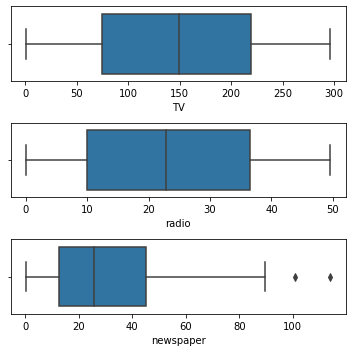

In [26]:
# Outliers Analysis
fig ,axs = plt.subplots(3 ,figsize = (5,5))
fig1 = sns.boxplot(data['TV'] ,ax = axs[0])
fig2 = sns.boxplot(data['radio'] ,ax = axs[1])
fig3 = sns.boxplot(data['newspaper'] ,ax = axs[2])

plt.tight_layout()

There are no outlier present in the data.

# EDA

Sales is our taget variable.

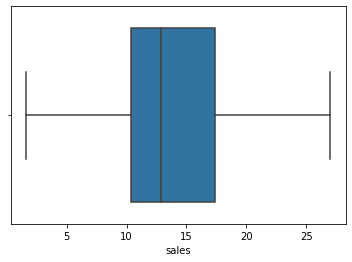

In [28]:
sns.boxplot(data['sales'])
plt.show()

# By using scatter plot let's see how Sales variable is related to others.


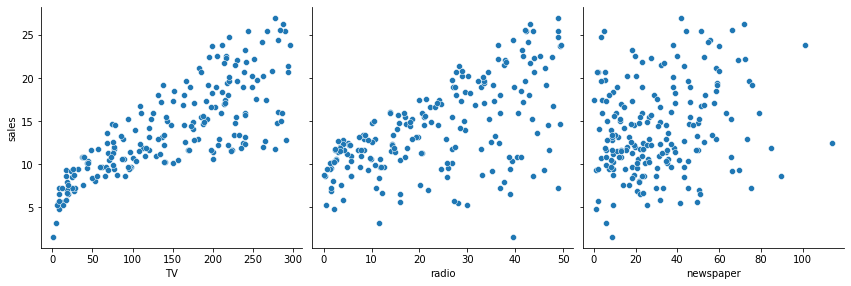

In [29]:
sns.pairplot(data ,x_vars =['TV','radio','newspaper'], y_vars="sales",height = 4,kind = 'scatter')

# Lets check the correlation between variables. 

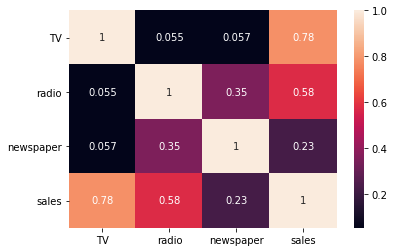

In [31]:
sns.heatmap(data.corr() ,annot = True)
plt.show()

# 
As heatmap showing ,the TV variable seems most correlated with Sales. So we are considering TV as our feature variable and moving for Simple Linear Regression.

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [32]:
X = data['TV']
y = data['sales']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7 ,test_size=0.3 ,random_state = 100)

In [34]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [35]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [36]:
# Building the linear model
import statsmodels.api as sm

In [37]:
X_train_sm = sm.add_constant(X_train)


# Fit the regression line using "OLS"
lr = sm.OLS(y_train ,X_train_sm).fit()

In [38]:
# Printing the Parameters i.e. the intercept and the slope of the regression line fitted.
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [39]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           2.84e-30
Time:                        19:17:01   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

1. The coefficient of TV is 0.04, with a very low P-value.

2. R-Squard is 0.61, it means that 61% varience in sales is explained by TV.This is a decent R-Squard value.

3. F statistic has a very low P-Value.

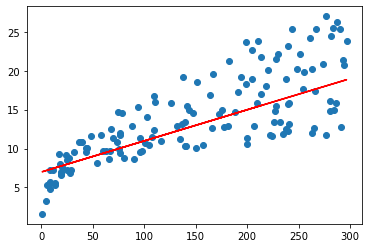

In [40]:
plt.scatter(X_train , y_train)
plt.plot(X_train , 6.989 + 0.04* X_train,'r')
plt.show()

# Model Evaluation

In [41]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

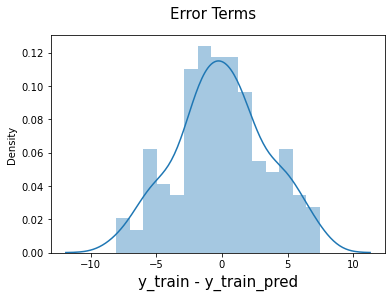

In [42]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

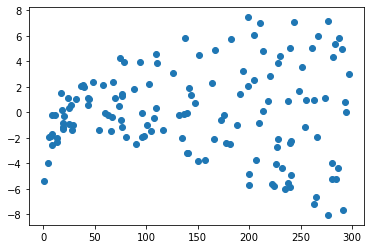

In [43]:
#Looking for patterns in the residuals
plt.scatter(X_train,res)
plt.show()


# Predictions on the Test Set


In [44]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [45]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

In [48]:
#Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

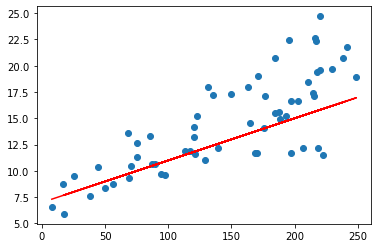

In [49]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.989 + 0.04 * X_test, 'r')
plt.show()

